📝Predicting diabetes
This data set originally comes from the National Institute of Diabetes and Digestive and Kidney Diseases. The objective is to predict, based on diagnostic measures, whether or not a patient has diabetes.

🧐 Hypothesys - What are we looking for?

We want to check if there is a significant relationship between the variables Pregnancies, Glucose, BloodPressure, SkinThickness, Insulin, BMI, DiabetesPedigreeFunction, Age and the class variable Outcome in the data set. It is hypothesized that certain values ​​or combinations of values ​​in these variables may be associated with an increased risk of suffering from diabetes, and that, therefore, these variables could be used to develop a predictive model for the probability of diabetes in...hypotheses, will be carried out Statistical analyses, such as regressions and significance tests, to evaluate the strength and direction of associations between the independent variables (Pregnancies, Glucose, BloodPressure, SkinThickness, Insulin, BMI, DiabetesPedigreeFunction, Age) and the dependent variable (Outcome). If the significant relationship is confirmed, a predictive model could be developed that uses these variables to estimate the probability of suffering from diabetes in a population.

📚Import libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from pickle import dump, load
from sklearn.feature_selection import chi2 , SelectKBest, mutual_info_regression
from sklearn.feature_selection import f_classif
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression, LinearRegression, Lasso, Ridge
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import accuracy_score, f1_score, mean_squared_error, r2_score, make_scorer, classification_report
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn import metrics

Data Ingestion

In [2]:
link = 'https://raw.githubusercontent.com/4GeeksAcademy/decision-tree-project-tutorial/main/diabetes.csv'
total_data = pd.read_csv(link)
total_data.to_csv('diabetes.csv', index=False)


Data variables dictionary:

✅Pregnancies. Número de embarazos del paciente (numérico)

✅Glucose. Concentración de glucosa en plasma a las 2 horas de un test de tolerancia oral a la glucosa (numérico)

✅BloodPressure. Presión arterial diastólica (medida en mm Hg) (numérico)

✅SkinThickness. Grosor del pliegue cutáneo del tríceps (medida en mm) (numérico)

✅Insulin. Insulina sérica de 2 horas (medida en mu U/ml) (numérico)

✅BMI. Índice de masa corporal (numérico)

✅DiabetesPedigreeFunction. Función de pedigrí de diabetes (numérico)

✅Age. Edad del paciente (numérico)

💥Outcome. Variable de clase (0 o 1), siendo 0 negativo en diabetes y 1, positivo (numérico)

Data exploration and descriptive analysis

In [3]:
total_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


There are 8 variables in the dataset and they are all numerical, the dependent variable is outcome which returns the values ​​0 and 1 that we will interpret in a Boolean way.

In [4]:
total_data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


Verifying zero values

In [5]:
zero_count_by_variable = (total_data == 0).sum()

# Print res
print("Variables with values ​​equal to 0 and quantity of 0 per variable:")
print(zero_count_by_variable)


Variables with values ​​equal to 0 and quantity of 0 per variable:
Pregnancies                 111
Glucose                       5
BloodPressure                35
SkinThickness               227
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
Outcome                     500
dtype: int64


Values of Glucose, Blood Pressure, Insulin, BMI and SkinThickness are abnormally low, suggesting that this is an error in the data, so these data are imputed against the median

In [6]:
columns_to_impute = ['Glucose', 'BloodPressure', 'Insulin', 'BMI', 'SkinThickness']
total_data[columns_to_impute] = total_data[columns_to_impute].apply(lambda x: x.replace(0, x.median()), axis=0)
# Print dataframe after imputation
print(total_data)


     Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0              6      148             72             35     30.5  33.6   
1              1       85             66             29     30.5  26.6   
2              8      183             64             23     30.5  23.3   
3              1       89             66             23     94.0  28.1   
4              0      137             40             35    168.0  43.1   
..           ...      ...            ...            ...      ...   ...   
763           10      101             76             48    180.0  32.9   
764            2      122             70             27     30.5  36.8   
765            5      121             72             23    112.0  26.2   
766            1      126             60             23     30.5  30.1   
767            1       93             70             31     30.5  30.4   

     DiabetesPedigreeFunction  Age  Outcome  
0                       0.627   50        1  
1                  

Check duplicates

In [68]:
print(total_data.duplicated().sum())

0


No duplicates found there

🚀 Descriptive data analysis

In [7]:
total_data.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,121.656250,72.386719,27.334635,94.652344,32.450911,0.471876,33.240885,0.348958
std,3.369578,30.438286,12.096642,9.229014,105.547598,6.875366,0.331329,11.760232,0.476951
min,0.000000,44.000000,24.000000,7.000000,14.000000,18.200000,0.078000,21.000000,0.000000
25%,1.000000,99.750000,64.000000,23.000000,30.500000,27.500000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,31.250000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


✅Pregnancies:

Número de valores: 768
Media: 3.85
Desviación estándar: 3.37
Percentiles: 25%: 1, 50%: 3, 75%: 6
Valor mínimo: 0
Valor máximo: 17

✅Glucose:

Número de valores: 768
Media: 121.66
Desviación estándar: 30.44
Percentiles: 25%: 99.75, 50%: 117, 75%: 140.25
Valor mínimo: 44
Valor máximo: 199

✅BloodPressure:

Número de valores: 768
Media: 72.39
Desviación estándar: 12.10
Percentiles: 25%: 64, 50%: 72, 75%: 80
Valor mínimo: 24
Valor máximo: 122

✅SkinThickness:

Número de valores: 768
Media: 27.33
Desviación estándar: 9.23
Percentiles: 25%: 23, 50%: 23, 75%: 32
Valor mínimo: 7
Valor máximo: 99

✅Insulin:

Número de valores: 768
Media: 94.65
Desviación estándar: 105.55
Percentiles: 25%: 30.5, 50%: 31.25, 75%: 127.25
Valor mínimo: 14
Valor máximo: 846

✅BMI:

Número de valores: 768
Media: 32.45
Desviación estándar: 6.88
Percentiles: 25%: 27.5, 50%: 32, 75%: 36.6
Valor mínimo: 18.2
Valor máximo: 67.1

✅DiabetesPedigreeFunction:

Número de valores: 768
Media: 0.47
Desviación estándar: 0.33
Percentiles: 25%: 0.24, 50%: 0.37, 75%: 0.63
Valor mínimo: 0.078
Valor máximo: 2.42

✅Age:

Número de valores: 768
Media: 33.24
Desviación estándar: 11.76
Percentiles: 25%: 24, 50%: 29, 75%: 41
Valor mínimo: 21
Valor máximo: 81

✅Outcome:

Número de valores: 768
Media: 0.35
Desviación estándar: 0.48
Percentiles: 25%: 0, 50%: 0, 75%: 1
Valor mínimo: 0
Valor máximo: 1

🚀 EDA

EXPLORING VARIABLES

In [8]:
#Verify null values
total_data.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

There is no null values

👉 Univariate analysis

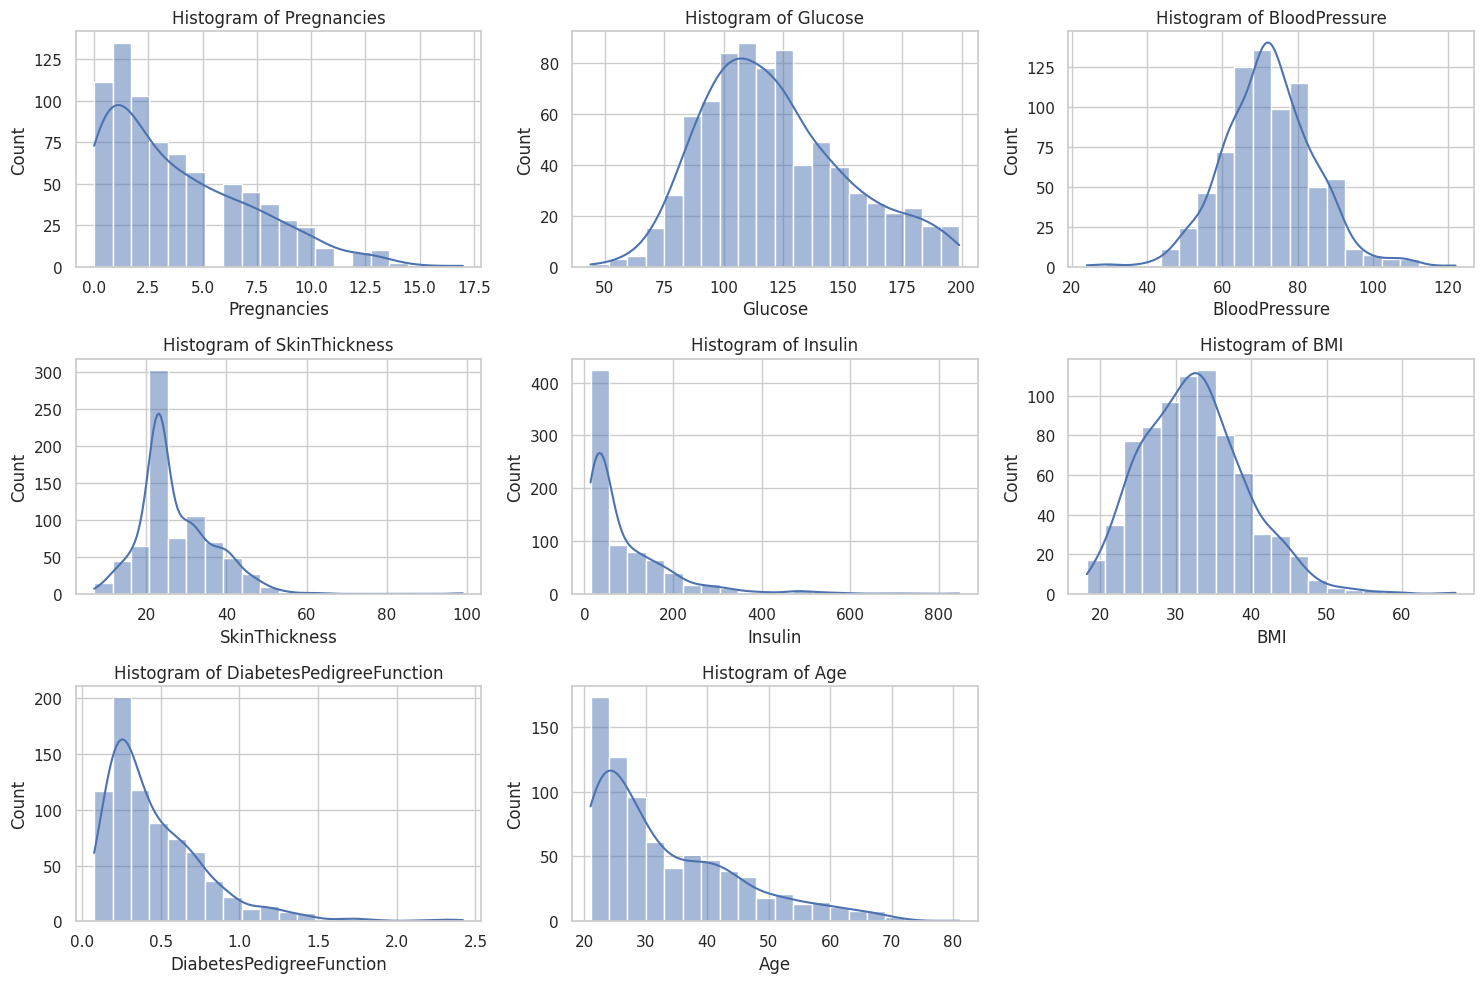

In [9]:
sns.set(style="whitegrid")

# Numeric variables
numeric_variables = ["Pregnancies", "Glucose", "BloodPressure", "SkinThickness", "Insulin", "BMI", "DiabetesPedigreeFunction", "Age"]

# Create histograms for each
plt.figure(figsize=(15, 10))
for i, variable in enumerate(numeric_variables, 1):
    plt.subplot(3, 3, i)
    sns.histplot(total_data[variable], bins=20, kde=True)
    plt.title(f'Histogram of {variable}')

plt.tight_layout()
plt.show()


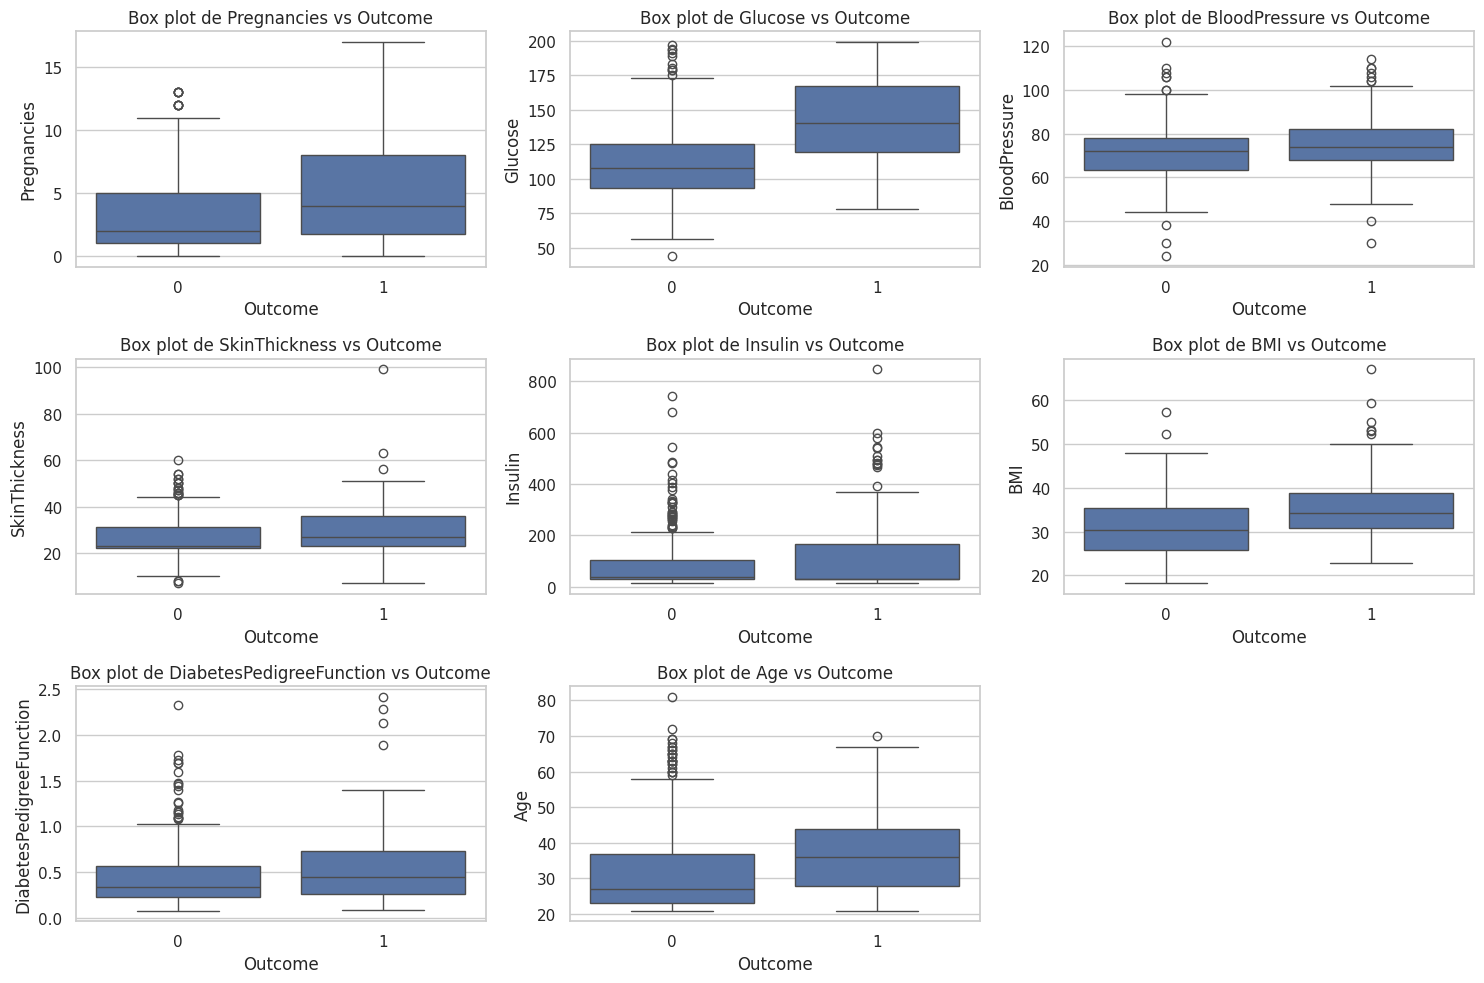

In [10]:
# box plots
plt.figure(figsize=(15, 10))
for i, variable in enumerate(numeric_variables, 1):
    plt.subplot(3, 3, i)
    sns.boxplot(x="Outcome", y=variable, data=total_data)
    plt.title(f'Box plot de {variable} vs Outcome')
plt.tight_layout()
plt.show()

👉 Multivariate analysis

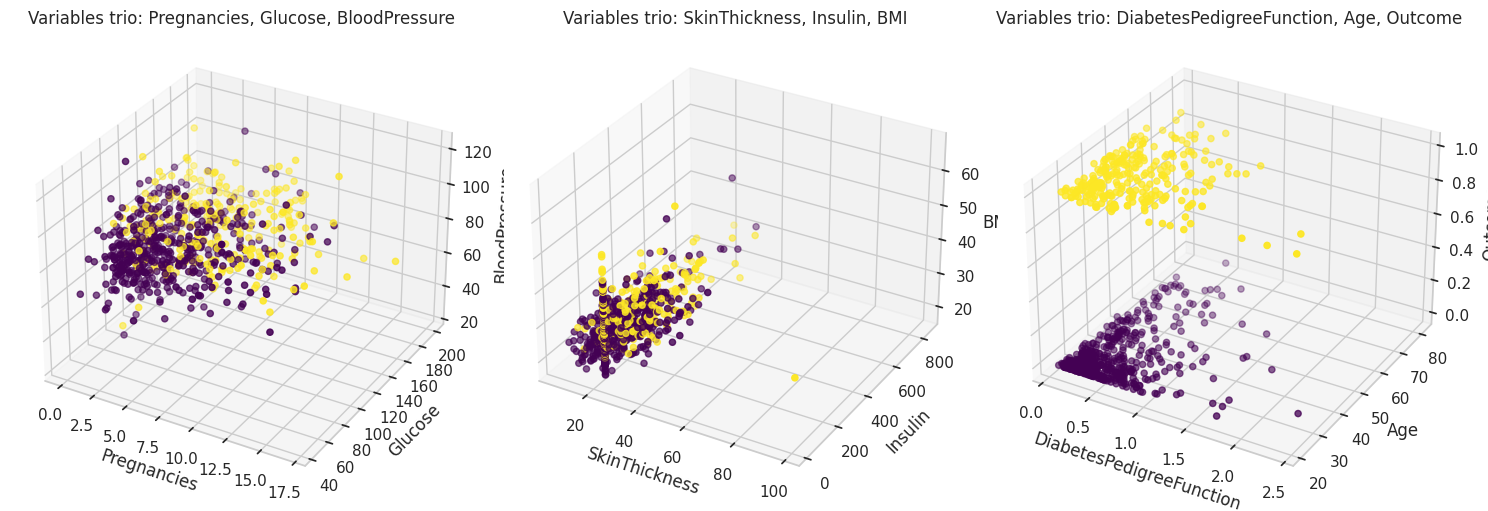

In [11]:
# Create 3D graphs using matplotlib
from mpl_toolkits.mplot3d import Axes3D

# Select trios variables
trios_variables = [
    ["Pregnancies", "Glucose", "BloodPressure"],
    ["SkinThickness", "Insulin", "BMI"],
    ["DiabetesPedigreeFunction", "Age", "Outcome"]
]

# Creating 3D graphs
fig = plt.figure(figsize=(15, 5))

for i, trio in enumerate(trios_variables, start=1):
    ax = fig.add_subplot(1, 3, i, projection='3d')
    ax.scatter(total_data[trio[0]], total_data[trio[1]], total_data[trio[2]], c=total_data["Outcome"], cmap='viridis')
    ax.set_xlabel(trio[0])
    ax.set_ylabel(trio[1])
    ax.set_zlabel(trio[2])
    ax.set_title(f'Variables trio: {trio[0]}, {trio[1]}, {trio[2]}')

plt.tight_layout()
plt.show()

👉 Comparing by pars 🧛‍♂️🧚‍♀️

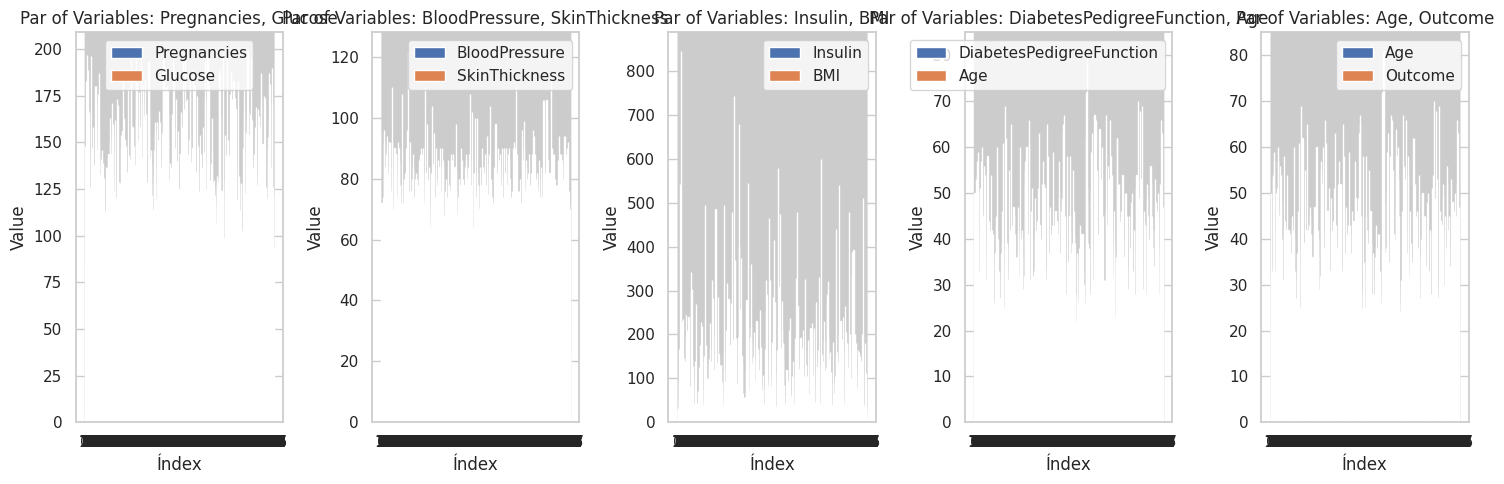

In [12]:

# Selecting by par
pares_variables = [
    ["Pregnancies", "Glucose"],
    ["BloodPressure", "SkinThickness"],
    ["Insulin", "BMI"],
    ["DiabetesPedigreeFunction", "Age"],
    ["Age", "Outcome"]
]

# Create Clustered Bar Subcharts
fig, axes = plt.subplots(nrows=1, ncols=len(pares_variables), figsize=(15, 5))

for i, par in enumerate(pares_variables):
    # Config bars and labels
    positions = np.arange(len(total_data))

    # Config width of bars
    width = 0.4

    # Create agruping bars
    for j, variable in enumerate(par):
        axes[i].bar(positions + j * width, total_data[variable], width, label=variable)

    # Config labels and legends
    axes[i].set_xticks(positions + width / 2)
    axes[i].set_xticklabels(total_data.index)
    axes[i].set_xlabel('Índex')
    axes[i].set_ylabel('Value')
    axes[i].set_title(f'Par of Variables: {", ".join(par)}')
    axes[i].legend()

plt.tight_layout()
plt.show()

👉 Comparing by trios 👩‍⚕️👨‍⚕️👩‍⚕️

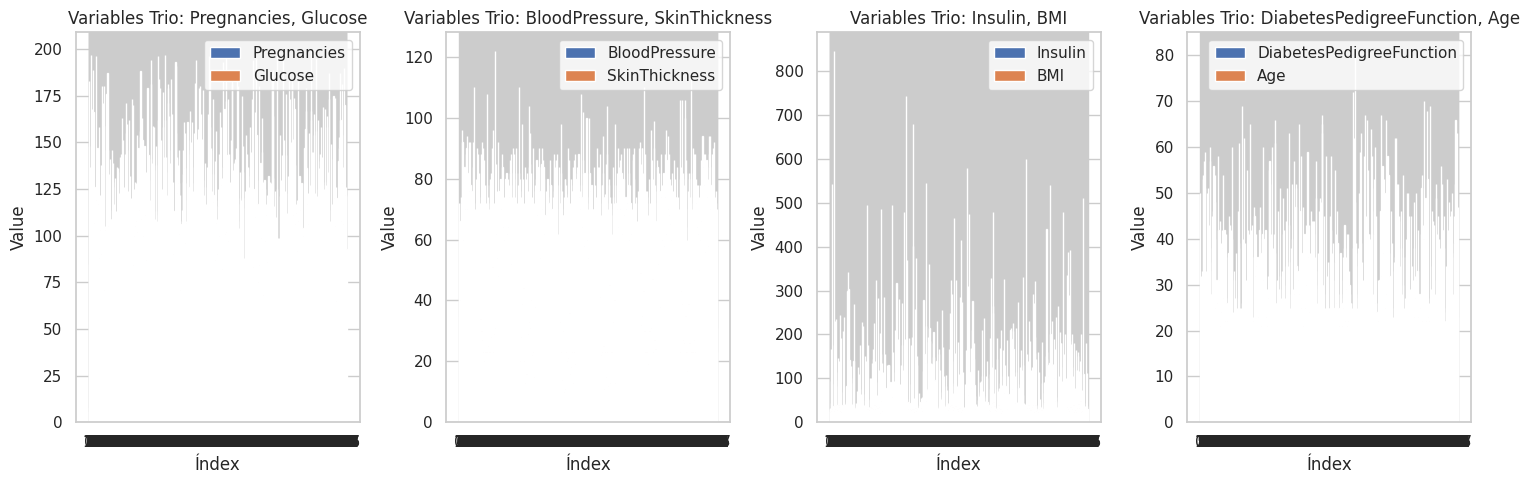

In [14]:
# Selection par of variables to plot
pares_variables = [
    ["Pregnancies", "Glucose"],
    ["BloodPressure", "SkinThickness"],
    ["Insulin", "BMI"],
    ["DiabetesPedigreeFunction", "Age"]
]

# Create Clustered Bar Subcharts
fig, axes = plt.subplots(nrows=1, ncols=len(pares_variables), figsize=(15, 5))

for i, par in enumerate(pares_variables):
    # Configure bar positions
    positions = np.arange(len(total_data))

    # Set the width of the bars
    width = 0.4

    # Create the bar chart
    for j, variable in enumerate(par):
        axes[i].bar(positions + j * width, total_data[variable], width, label=variable)

    # Config labels and legends
    axes[i].set_xticks(positions + width / 2)
    axes[i].set_xticklabels(total_data.index)
    axes[i].set_xlabel('Índex')
    axes[i].set_ylabel('Value')
    axes[i].set_title(f'Variables Trio: {", ".join(par)}')
    axes[i].legend()

plt.tight_layout()
plt.show()


Once the EDA is completed, we calculate the correlation matrix of the variables with respect to Outcome

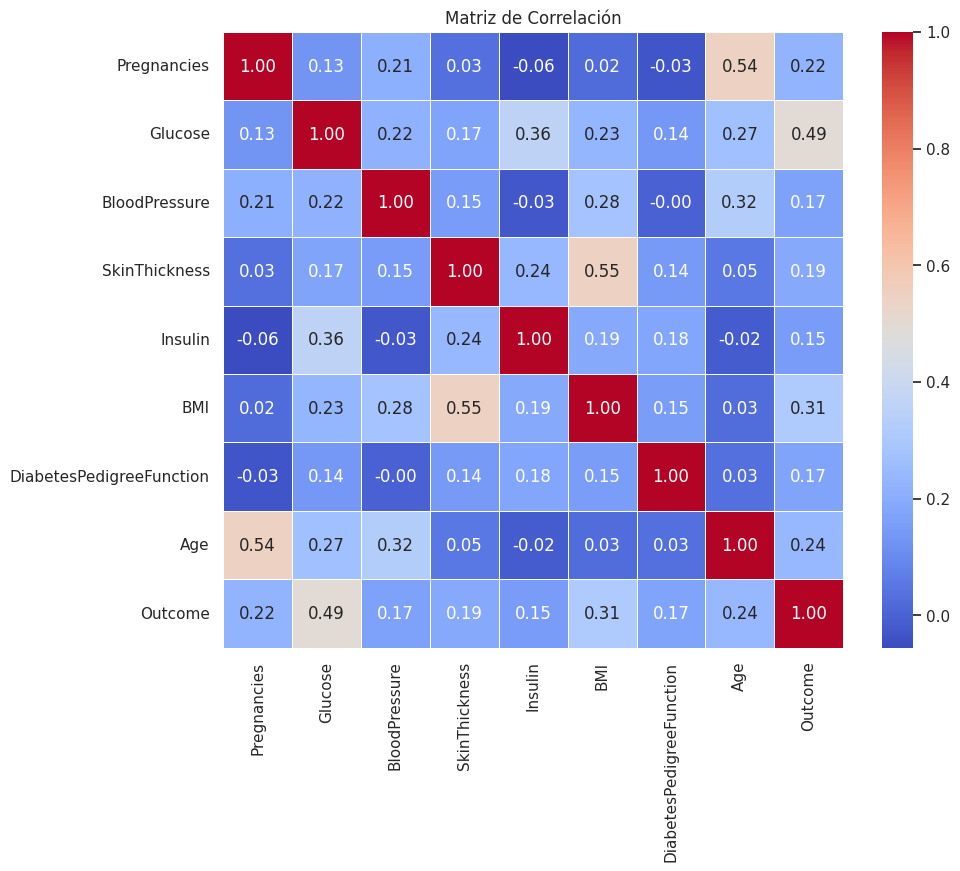

In [15]:
# Create correlation matrix
correlation_matrix = total_data.corr()

# Create heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=.5)
plt.title('Matriz de Correlación')
plt.show()

👩‍💻Variables with significant correlation with outcome

👍The highest correlations between Outcome and the independent variables observed are:

👉Glucose: 49%
👉BMI: 31%
👉AGE: 24%
👉Pregnancies: 22%

Numerical calculation of the correlation matrix

In [17]:
# Create matrix
correlation_matrix = total_data.corr()

# Print the matrix
print("Matrix Correlation:\n", correlation_matrix)

Matrix Correlation:
                           Pregnancies   Glucose  BloodPressure  SkinThickness  \
Pregnancies                  1.000000  0.128213       0.208615       0.032568   
Glucose                      0.128213  1.000000       0.218937       0.172143   
BloodPressure                0.208615  0.218937       1.000000       0.147809   
SkinThickness                0.032568  0.172143       0.147809       1.000000   
Insulin                     -0.055697  0.357573      -0.028721       0.238188   
BMI                          0.021546  0.231400       0.281132       0.546951   
DiabetesPedigreeFunction    -0.033523  0.137327      -0.002378       0.142977   
Age                          0.544341  0.266909       0.324915       0.054514   
Outcome                      0.221898  0.492782       0.165723       0.189065   

                           Insulin       BMI  DiabetesPedigreeFunction  \
Pregnancies              -0.055697  0.021546                 -0.033523   
Glucose             

👩‍🏫 Pair plot (All respect tooutcome)

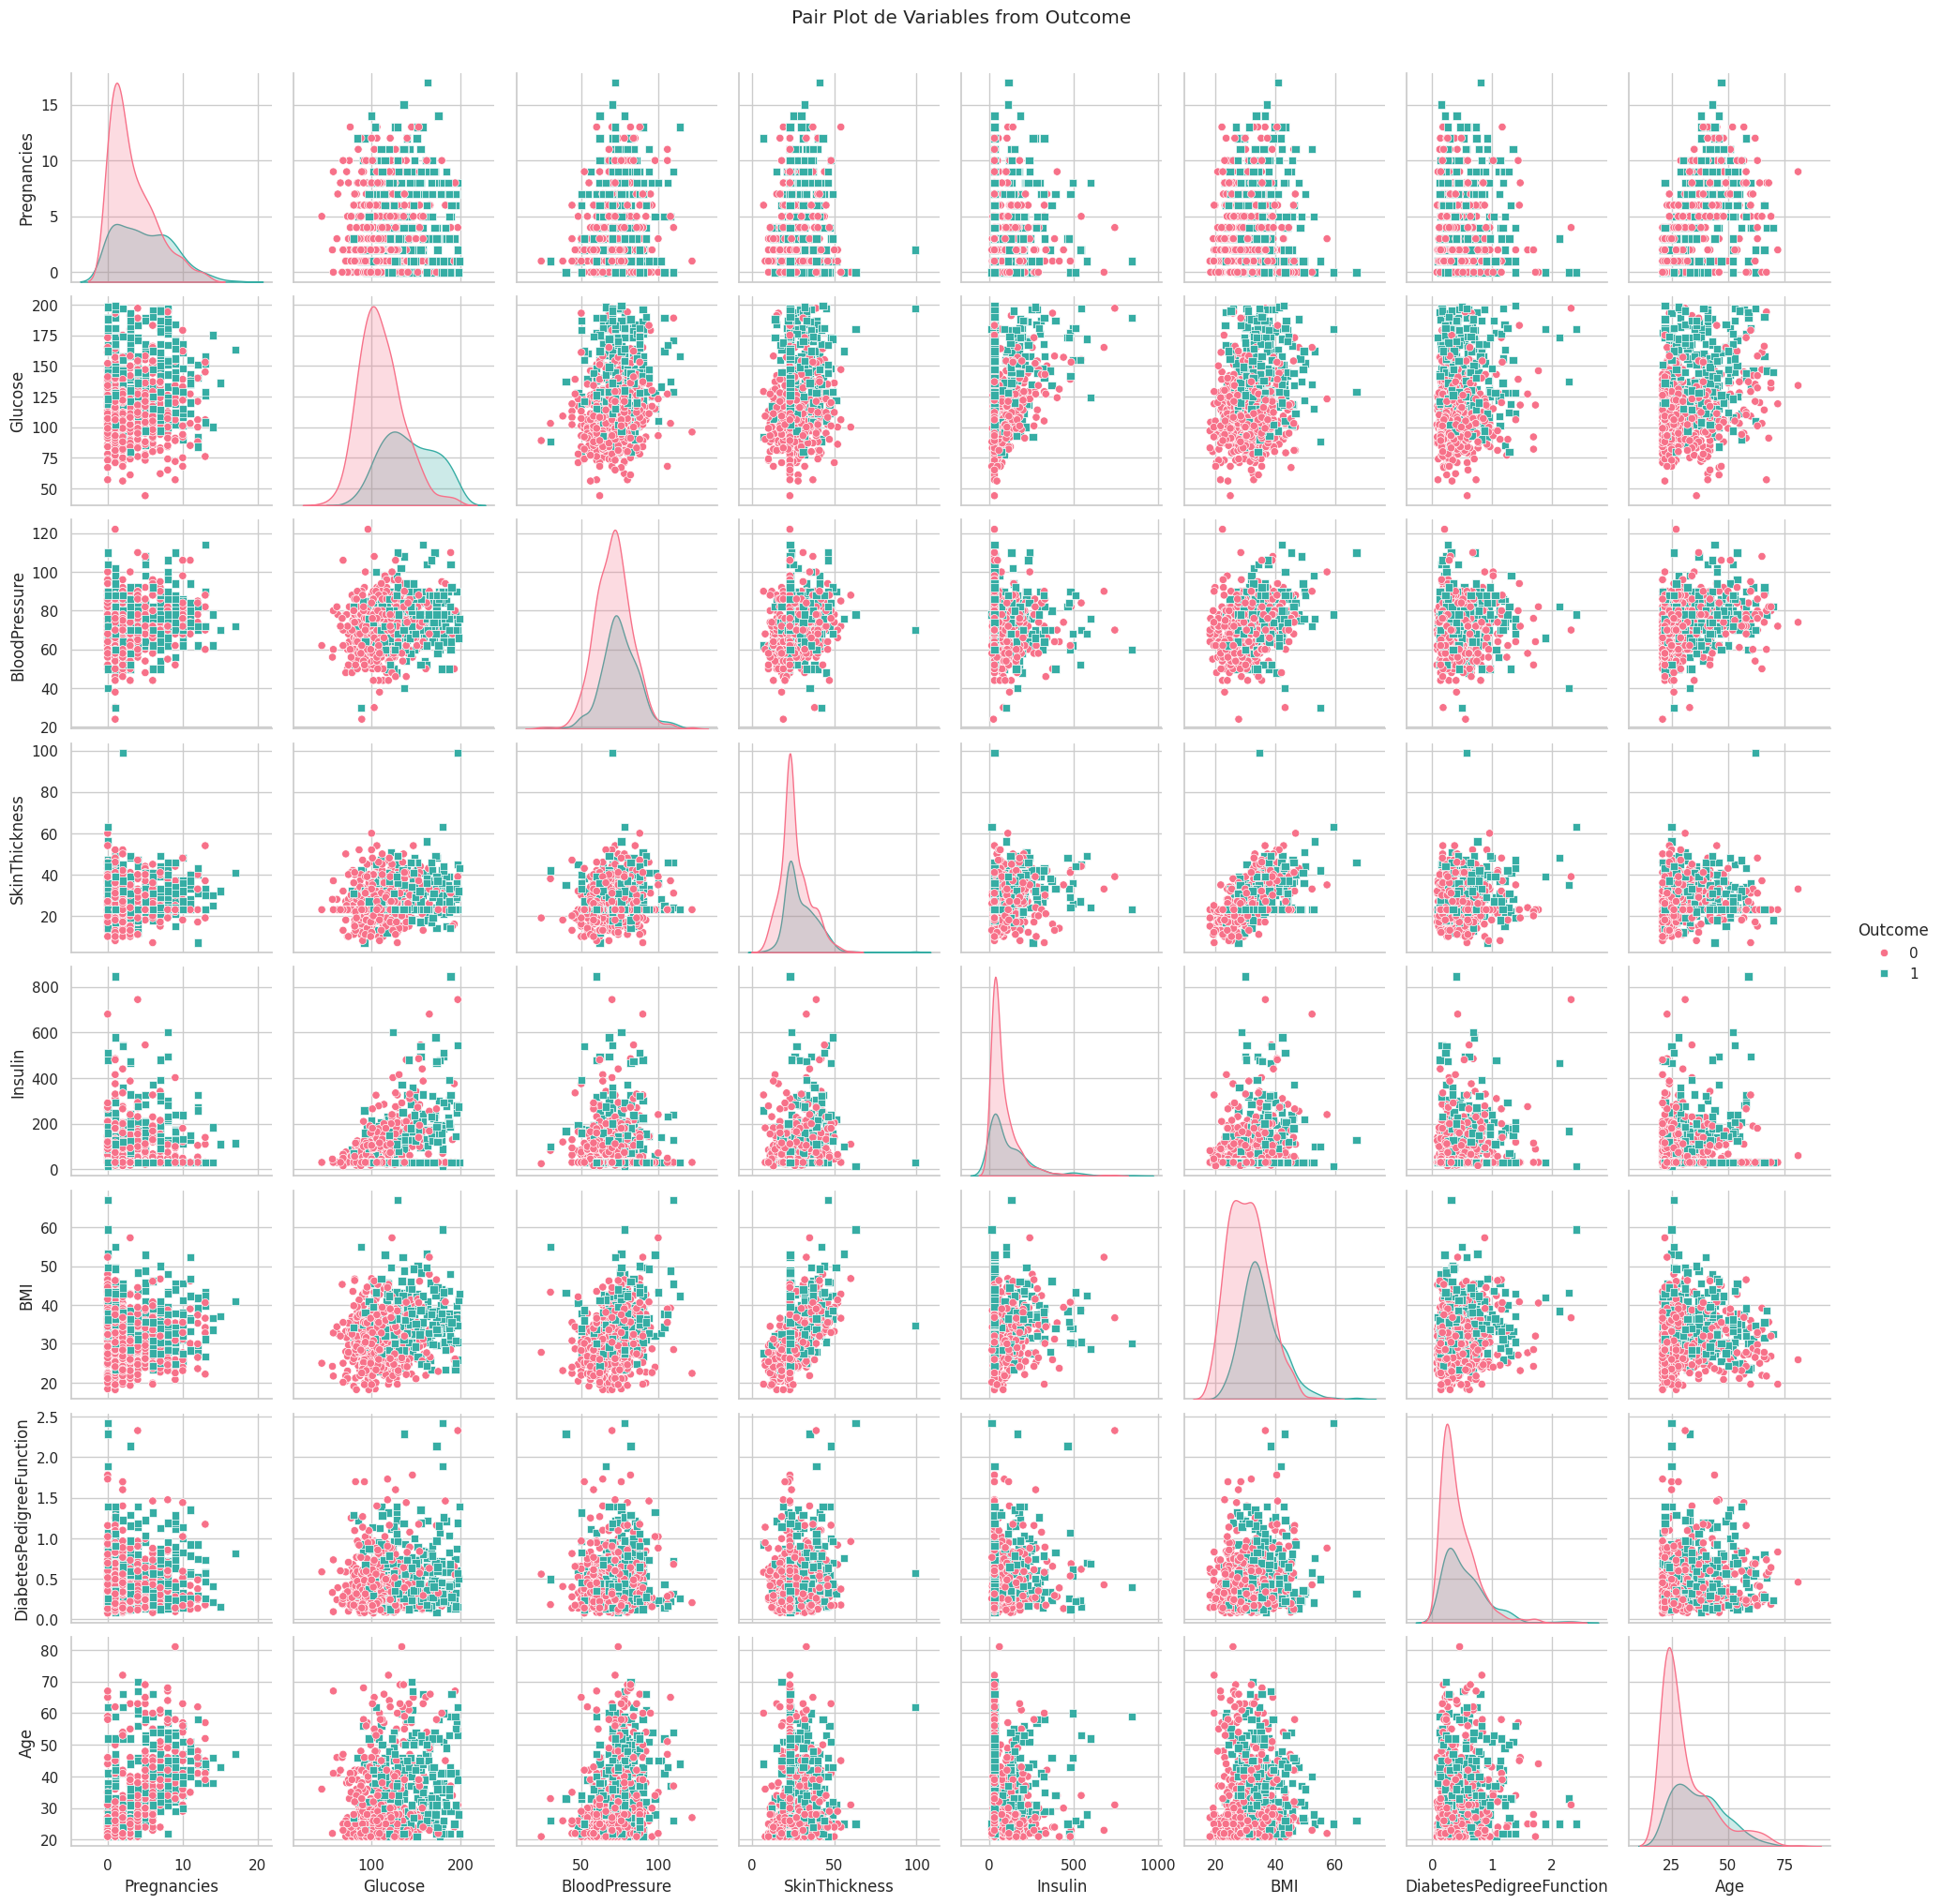

In [18]:
# Select all variables
variables_intereses = ["Pregnancies", "Glucose", "BloodPressure", "SkinThickness", "Insulin", "BMI", "DiabetesPedigreeFunction", "Age", "Outcome"]

# Create a subset of the data
subset_data = total_data[variables_intereses]

# Creete pair plot
sns.pairplot(subset_data, hue="Outcome", markers=["o", "s"], palette="husl")
plt.suptitle("Pair Plot de Variables from Outcome", y=1.02)
plt.show()


Dealing with 0 values

In [19]:
# Count the number of rows with at least a value 0
num_rows_with_0 = (total_data == 0).any(axis=1).sum()

# Print the number of rows with 0 values
print(f"Number of rows including 0 values: {num_rows_with_0}")
# Filter rows with at least one value equal to 0
rows_with_0 = total_data[(total_data == 0).any(axis=1)]

# Show resulting rows
print("Rows with at least one value equal to 0:")
print(rows_with_0)


Number of rows including 0 values: 538
Rows with at least one value equal to 0:
     Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
1              1       85             66             29     30.5  26.6   
3              1       89             66             23     94.0  28.1   
4              0      137             40             35    168.0  43.1   
5              5      116             74             23     30.5  25.6   
7             10      115             72             23     30.5  35.3   
..           ...      ...            ...            ...      ...   ...   
762            9       89             62             23     30.5  22.5   
763           10      101             76             48    180.0  32.9   
764            2      122             70             27     30.5  36.8   
765            5      121             72             23    112.0  26.2   
767            1       93             70             31     30.5  30.4   

     DiabetesPedigreeFunction  

We decided to keep values ​​at 0, in this case, if we eliminate the 0 values ​​of the outcome that is committed as a boolean, the model will not predict correctly.

✨ Data Cleaning - Feature engineering

Calculating limits and removil outliers

In [22]:
out_of_limit_values = {}  # Inicializar el diccionario fuera del bucle

# Calculate upper and lower limits for outlier detection for each variable
for variable in total_data.columns:
    variable_stats = total_data[variable].describe()

    iqr = variable_stats["75%"] - variable_stats["25%"]
    upper_limit = variable_stats["75%"] + 1.5 * iqr
    lower_limit = variable_stats["25%"] - 1.5 * iqr

    # Identify values outside the limits
    upper_values = total_data[total_data[variable] > upper_limit]
    lower_values = total_data[total_data[variable] < lower_limit]

    # Store count in the dictionary
    out_of_limit_values[variable] = {
        'upper': len(upper_values),
        'lower': len(lower_values)
    }

    # Print the results
    print(f"\nUpper and lower limits for outlier detection of {variable}:")
    print(f"Upper: {round(upper_limit, 2)}, Lower: {round(lower_limit, 2)}, Interquartile Range: {round(iqr, 2)}")
    print(f"Number of values above the upper limit: {len(upper_values)}")
    print(f"Number of values below the lower limit: {len(lower_values)}")

    # Remove outliers from the DataFrame
    total_data = total_data[(total_data[variable] >= lower_limit) & (total_data[variable] <= upper_limit)]

# Print the shape of the data after removing outliers
print("\nShape of the data after removing outliers:")
print(total_data.shape)




Upper and lower limits for outlier detection of Pregnancies:
Upper: 13.5, Lower: -6.5, Interquartile Range: 5.0
Number of values above the upper limit: 4
Number of values below the lower limit: 0

Upper and lower limits for outlier detection of Glucose:
Upper: 201.5, Lower: 37.5, Interquartile Range: 41.0
Number of values above the upper limit: 0
Number of values below the lower limit: 0

Upper and lower limits for outlier detection of BloodPressure:
Upper: 104.0, Lower: 40.0, Interquartile Range: 16.0
Number of values above the upper limit: 10
Number of values below the lower limit: 4

Upper and lower limits for outlier detection of SkinThickness:
Upper: 45.5, Lower: 9.5, Interquartile Range: 9.0
Number of values above the upper limit: 29
Number of values below the lower limit: 4

Upper and lower limits for outlier detection of Insulin:
Upper: 254.25, Lower: -103.75, Interquartile Range: 89.5
Number of values above the upper limit: 52
Number of values below the lower limit: 0

Upper 

In [23]:
total_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 615 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               615 non-null    int64  
 1   Glucose                   615 non-null    int64  
 2   BloodPressure             615 non-null    int64  
 3   SkinThickness             615 non-null    int64  
 4   Insulin                   615 non-null    float64
 5   BMI                       615 non-null    float64
 6   DiabetesPedigreeFunction  615 non-null    float64
 7   Age                       615 non-null    int64  
 8   Outcome                   615 non-null    int64  
dtypes: float64(3), int64(6)
memory usage: 48.0 KB


In [24]:
total_data = total_data.drop_duplicates().reset_index(drop = True)
total_data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,30.5,33.6,0.627,50,1
1,1,85,66,29,30.5,26.6,0.351,31,0
2,8,183,64,23,30.5,23.3,0.672,32,1
3,1,89,66,23,94.0,28.1,0.167,21,0
4,5,116,74,23,30.5,25.6,0.201,30,0


In [26]:
# Outliers Cleaning

total_data = total_data[(total_data['Glucose'] > 0) & (total_data['BloodPressure'] > 40) & (total_data['BMI'] > 3) & (total_data['SkinThickness'] < 33 )]

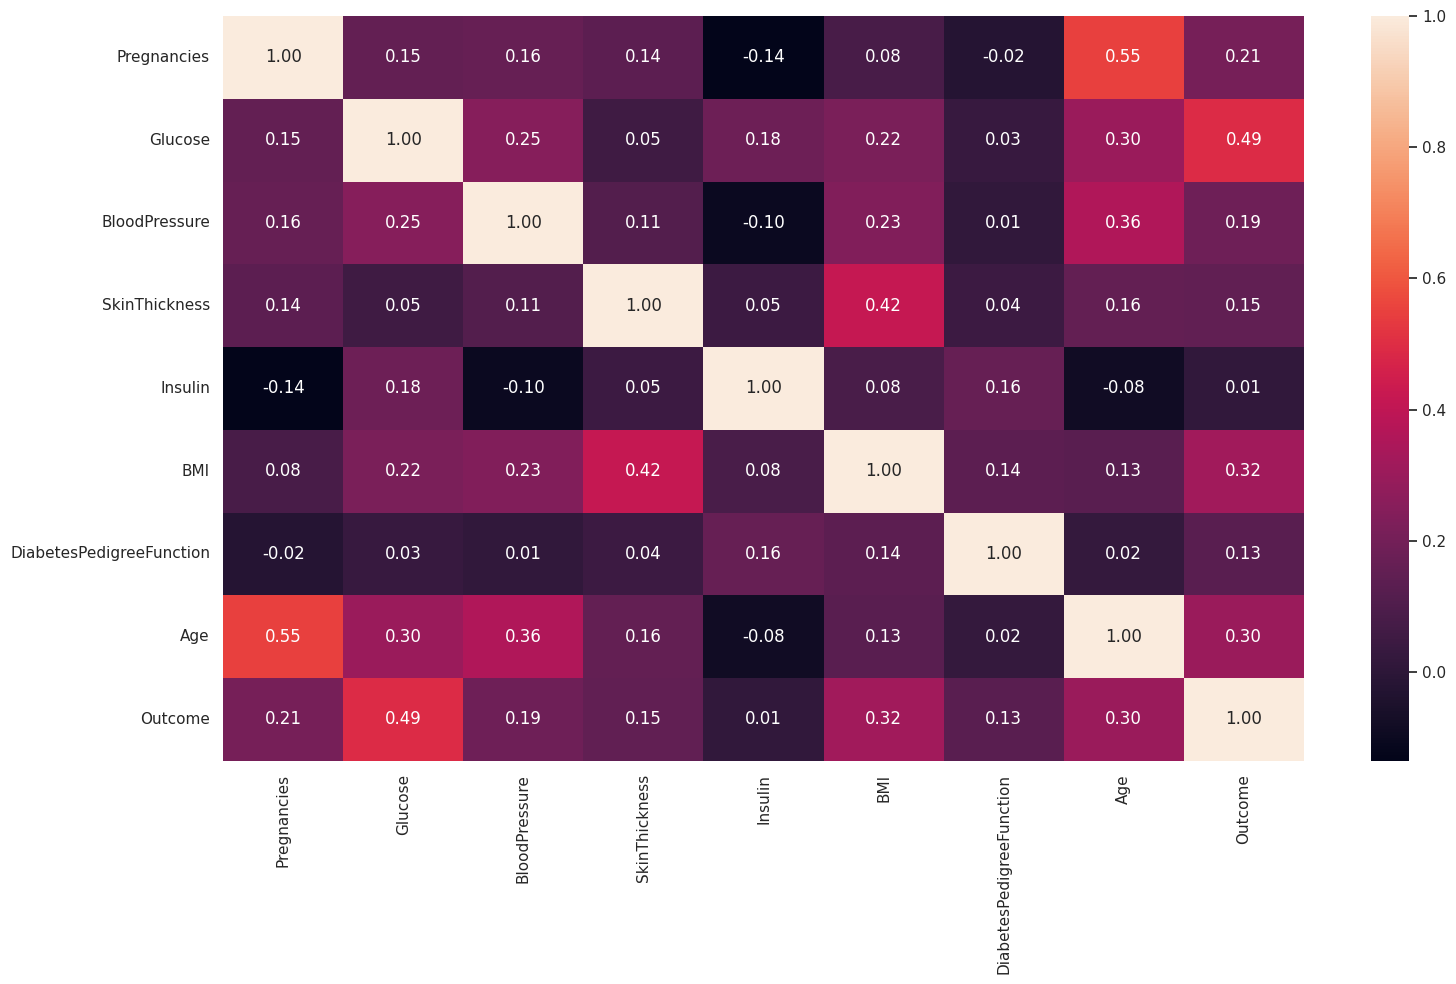

In [27]:
# Heatmap of Dataset

# Draw Figure
fig, axis = plt.subplots(figsize=(16, 10))

# Plot Heatmap

sns.heatmap(total_data.corr(), annot=True, fmt='.2f')

# Adjust Plot
plt.tight_layout()

#Show Plot
plt.show()

👨‍💻Feature Selection

In [28]:
# Normalization 
from sklearn.preprocessing import StandardScaler

num_variables = ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI',
                     'DiabetesPedigreeFunction', 'Age']

scaler = StandardScaler()
norm_features = scaler.fit_transform(total_data[num_variables])
total_data_norm = pd.DataFrame(norm_features, index = total_data.index, columns = num_variables)
total_data_norm['Outcome'] = total_data['Outcome']
total_data_norm.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
1,-0.857409,-1.106393,-0.494602,1.182607,-0.624742,-0.673963,-0.219266,-0.096116,0
2,1.405737,2.386729,-0.685347,-0.042046,-0.624742,-1.240866,1.203218,-0.002618,1
3,-0.857409,-0.963817,-0.494602,-0.042046,0.652787,-0.416279,-1.034647,-1.031099,0
4,0.435817,-0.001426,0.268378,-0.042046,-0.624742,-0.845752,-0.883979,-0.189615,0
5,-0.210796,-1.355902,-2.020562,1.794934,0.532076,0.081909,-0.675702,-0.563608,1


In [94]:
# Feature selection

from sklearn.feature_selection import SelectKBest
from sklearn.model_selection import train_test_split

X = total_data.drop("Outcome", axis = 1)
y = total_data["Outcome"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.5, random_state = 42)

selection_model = SelectKBest(k = 7)
selection_model.fit(X_train, y_train)

selected_columns = X_train.columns[selection_model.get_support()]
X_train_sel = pd.DataFrame(selection_model.transform(X_train), columns = selected_columns)
X_test_sel = pd.DataFrame(selection_model.transform(X_test), columns = selected_columns)

X_train_sel.head()

,Pregnancies,Glucose,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,0.0,141.0,26.0,30.5,32.4,0.433,22.0
1,2.0,115.0,22.0,30.5,30.8,0.421,21.0
2,5.0,130.0,23.0,30.5,39.1,0.956,37.0
3,3.0,150.0,23.0,30.5,21.0,0.207,37.0
4,3.0,82.0,23.0,30.5,21.1,0.389,25.0


In [29]:
# Split DataSet and Select Best Features
from sklearn.feature_selection import SelectKBest
from sklearn.model_selection import train_test_split

# We divide the dataset into training and test samples.
X = total_data_norm.drop('Outcome', axis = 1)
y = total_data_norm['Outcome']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

# With a value of k = 5 we implicitly mean that we want to remove 2 features from the dataset
selection_model = SelectKBest(k = 6)
selection_model.fit(X_train, y_train)
ix = selection_model.get_support()
X_train_sel = pd.DataFrame(selection_model.transform(X_train), columns = X_train.columns.values[ix])
X_test_sel = pd.DataFrame(selection_model.transform(X_test), columns = X_test.columns.values[ix])

X_train_sel.head()

,Pregnancies,Glucose,BloodPressure,BMI,DiabetesPedigreeFunction,Age
0,-1.180715,-0.393511,-0.303857,-1.807770,-0.728879,-0.937601
1,2.052350,1.638203,1.222104,-0.484995,-0.968175,2.054344
2,0.435817,0.034218,1.985084,0.614455,-0.281306,0.558372
3,-0.534102,-1.248969,0.077633,-0.072701,0.649291,-0.657106
4,2.698963,-1.142037,0.077633,-0.141417,-0.458563,1.306358


In [31]:
import os

# Directorio de salida
output_directory = "/workspace/Diabetes-Decision-Tree/data/processed"

# Guardar los conjuntos de datos después de la selección de características en la carpeta "data/processed"
X_train_sel.to_csv(os.path.join(output_directory, "X_train_selected.csv"), index=False)
X_test_sel.to_csv(os.path.join(output_directory, "X_test_selected.csv"), index=False)
y_train.to_csv(os.path.join(output_directory, "y_train.csv"), index=False)
y_test.to_csv(os.path.join(output_directory, "y_test.csv"), index=False)


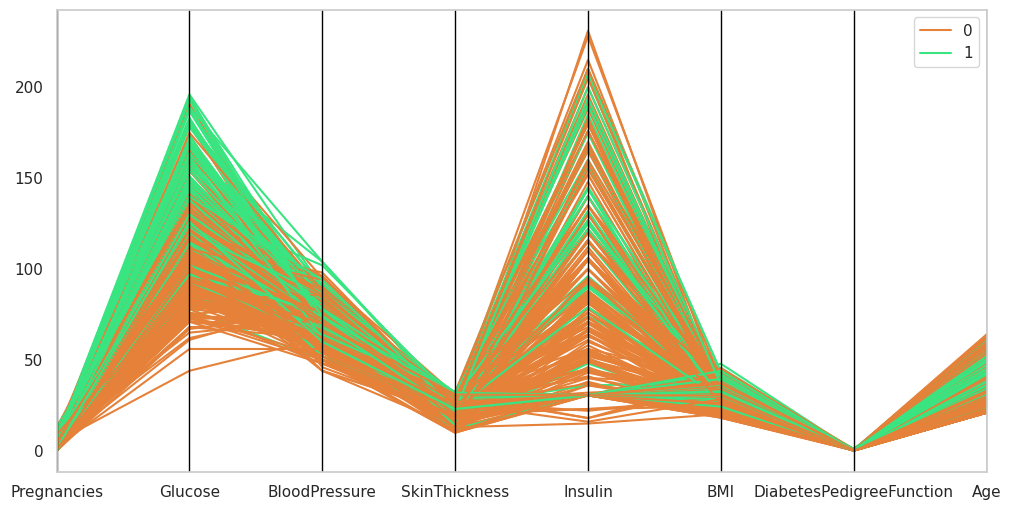

In [32]:
#Graphics
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))

pd.plotting.parallel_coordinates(total_data, "Outcome", color = ("#E58139", "#39E581", "#8139E5"))

plt.show()

🌼Decision Tree

In [36]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

# CLoad data sets from CSV files
X_train_sel = pd.read_csv(os.path.join(output_directory, "X_train_selected.csv"))
X_test_sel = pd.read_csv(os.path.join(output_directory, "X_test_selected.csv"))
y_train = pd.read_csv(os.path.join(output_directory, "y_train.csv")).squeeze()
y_test = pd.read_csv(os.path.join(output_directory, "y_test.csv")).squeeze()

# Create and train the model
model = DecisionTreeClassifier(random_state=42)
model.fit(X_train_sel, y_train)

# Doing test prediction
y_pred = model.predict(X_test_sel)

# Evaluation model precision
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")


Accuracy: 0.77


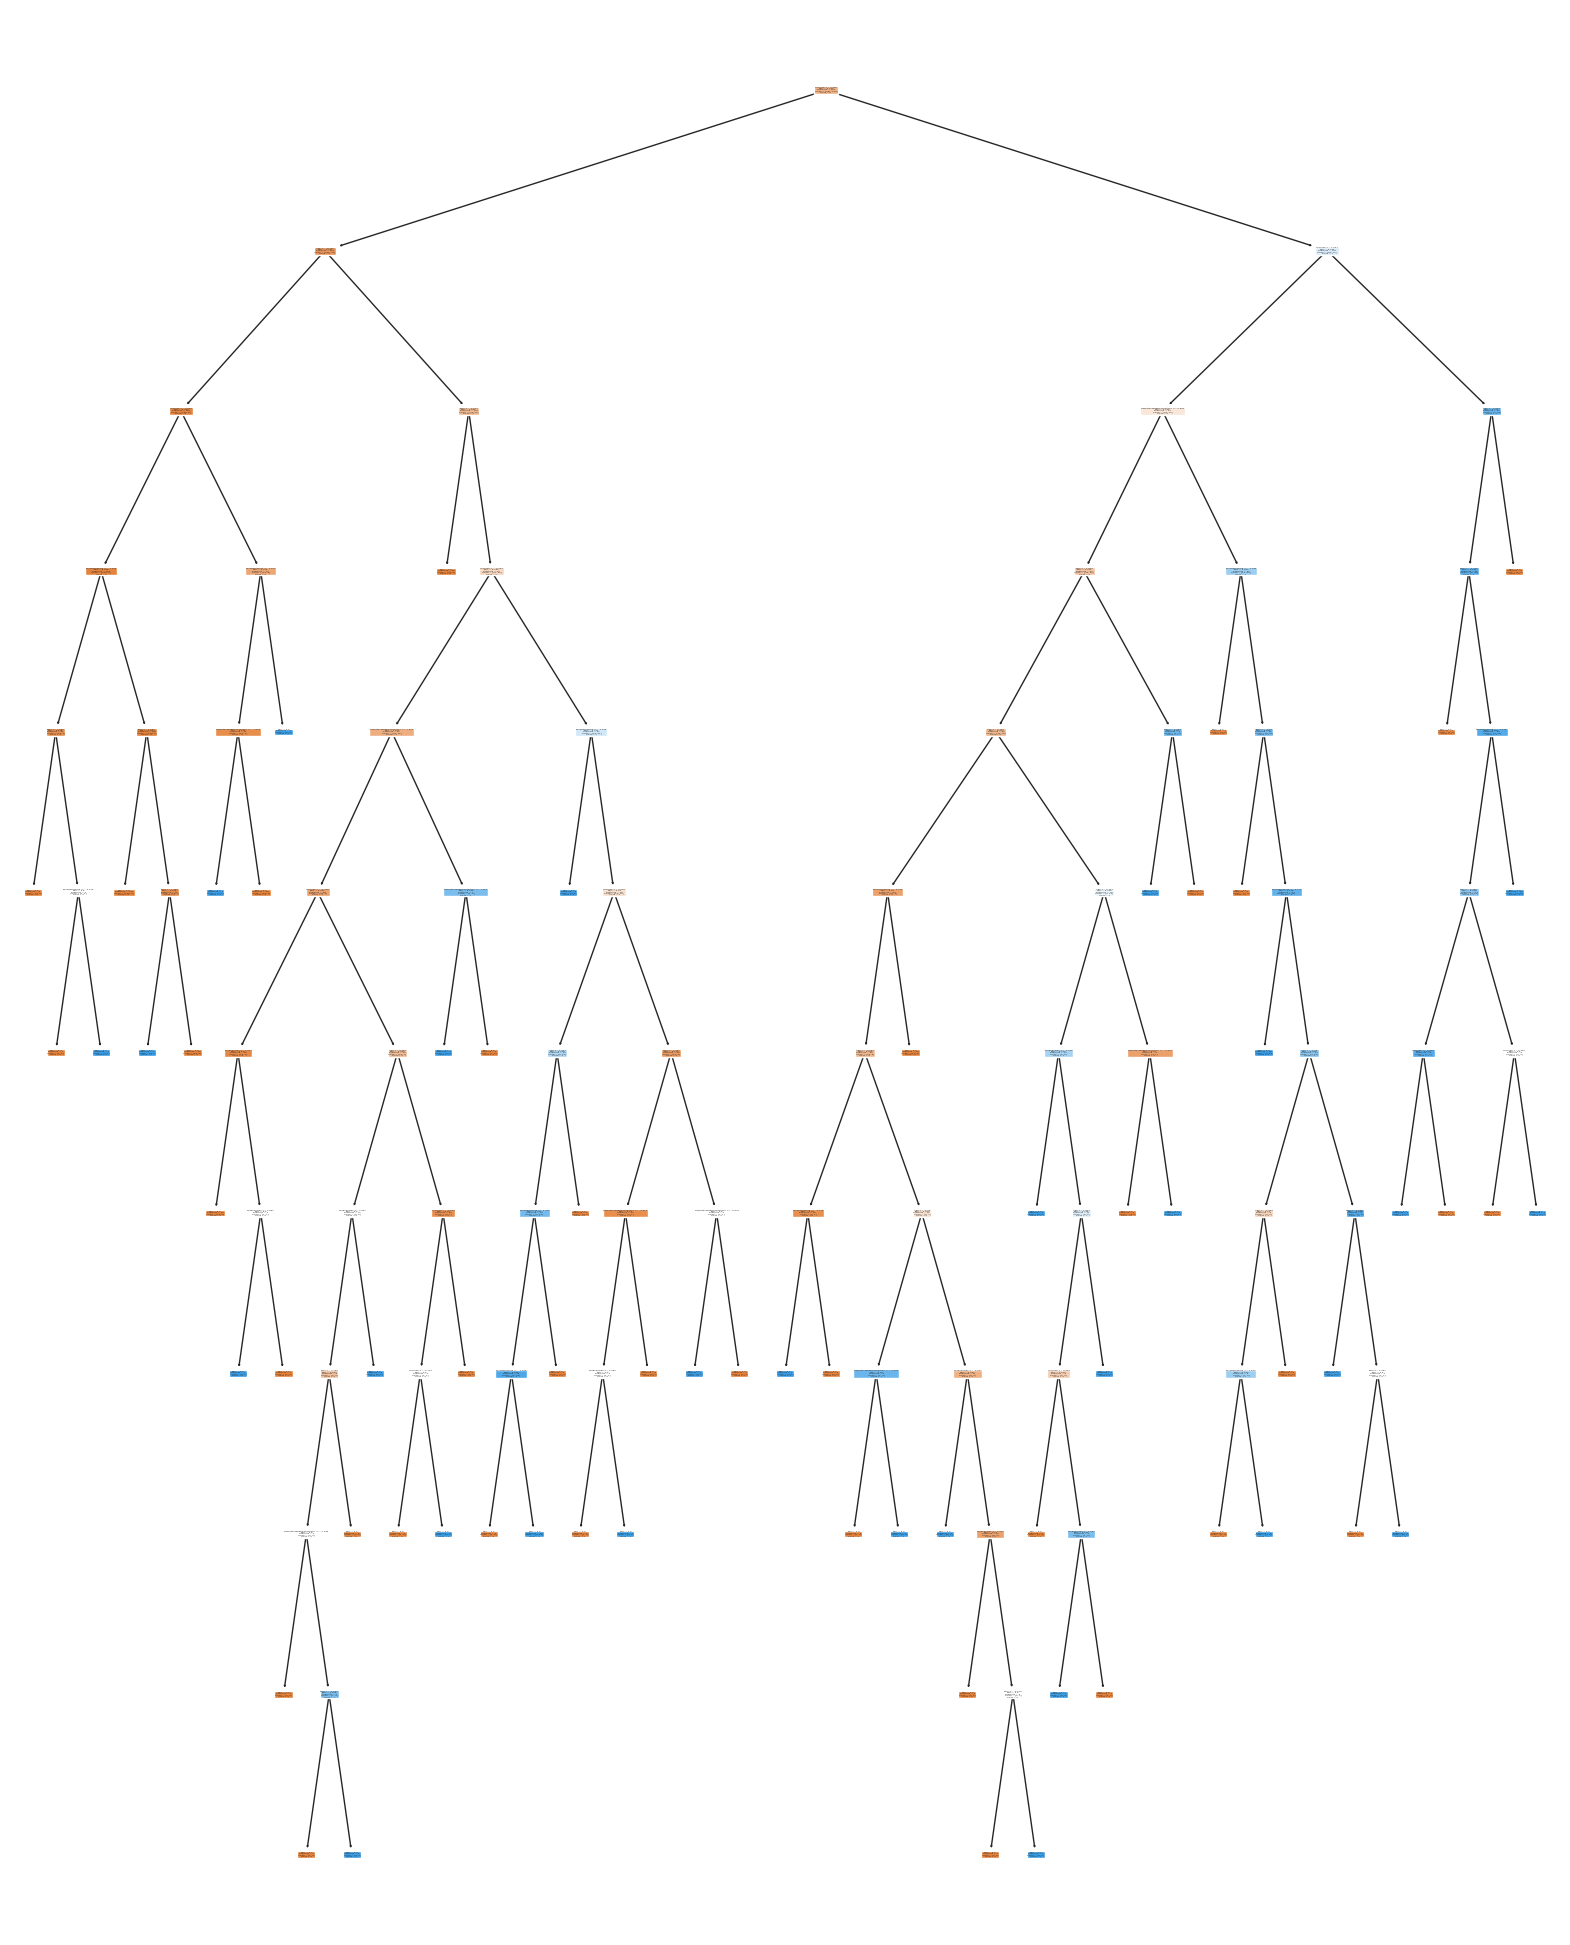

<Figure size 640x480 with 0 Axes>

In [38]:
# Plot the Decision Tree
from sklearn import tree

fig = plt.figure(figsize=(20,25))

tree.plot_tree(model,
               feature_names = list(X_train_sel.columns),
               class_names = ["0", "1"],
               filled = True)

plt.show()
plt.savefig('tree.png')

In [39]:
# Model Prediction
y_pred = model.predict(X_test_sel)
y_pred

array([0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0,
       1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [40]:
# Check Accuracy
from sklearn.metrics import accuracy_score

print(f'The Accuracy is: {accuracy_score(y_test, y_pred)}')

The Accuracy is: 0.77


In [41]:
# Save the Model
from pickle import dump

dump(model, open("/workspace/Diabetes-Decision-Tree/models/decision_tree_classifier_default_42.sav", "wb"))

Model Optimization (RandomForest + HyperParameters)

🎄RandomForest

In [42]:
# Start by Random Forest Optimization
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier(n_estimators = 1000, random_state = 42)
model.fit(X_train_sel, y_train)

RandomForestClassifier(n_estimators=1000, random_state=42)

In [43]:
y_pred = model.predict(X_test_sel)
y_pred

array([0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0,
       1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0])

In [44]:
print(f'The Accuracy is: {accuracy_score(y_test, y_pred)}')

The Accuracy is: 0.79


Use GridSearch to optimize HyperParameters

In [49]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier


hyperparams = {
    "n_estimators": [50, 100, 150],
    "max_depth": [None, 5, 10, 20],
    "min_samples_split": [2, 5, 10],
    "min_samples_leaf": [1, 2, 4],
    "max_features": ["sqrt", "log2"]
    
}

model = RandomForestClassifier(random_state=42)

grid = GridSearchCV(model, hyperparams, scoring="accuracy", cv=5)
grid.fit(X_train_sel, y_train)

print(f"Best Parameters: {grid.best_params_}")

Best Parameters: {'max_depth': 5, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 150}


In [64]:
# Retrain the Model with Hyperparameters
model_grid = RandomForestClassifier(max_depth=5, max_features='sqrt', min_samples_leaf=1, min_samples_split=5, n_estimators=150)
model_grid.fit(X_train_sel, y_train)
y_pred = model_grid.predict(X_test_sel)

print(f'The Accuracy is: {accuracy_score(y_test, y_pred)}')

The Accuracy is: 0.81


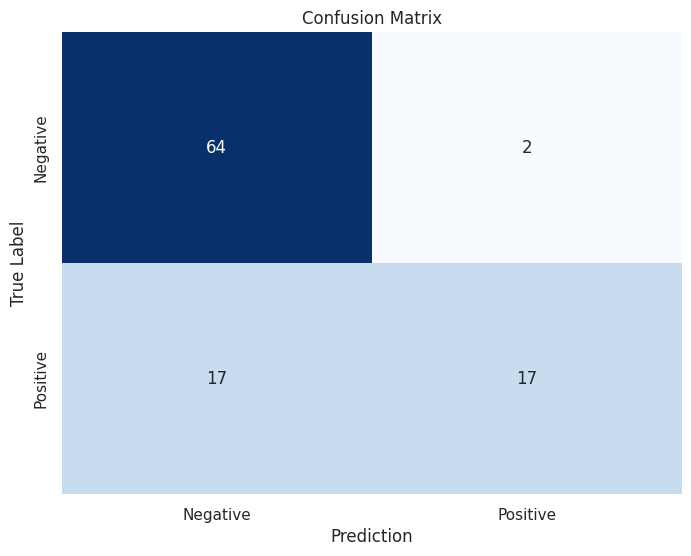

In [65]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

# Get the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Create a heatmap with seaborn
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['Negative', 'Positive'],
            yticklabels=['Negative', 'Positive'])

# Add labels and title
plt.xlabel('Prediction')
plt.ylabel('True Label')
plt.title('Confusion Matrix')

# Show the plot
plt.show()

In [ ]:
✅True Positive: 64

⛔False Negative: 2 

⛔False Positive: 17

✅True Negative: 17


In [66]:
dump(model_grid, open("/workspace/Diabetes-Decision-Tree/models/random_forest_classifier_default_42_max_depth=5_max_features=sqrt_min_samples_leaf1_min_samples_split=5_n_estimators=150.sav", "wb"))